<a href="https://colab.research.google.com/github/prokudin/JAMDiFF_library/blob/main/JAMDiFF_Library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# **Institutions and Authors**
*  Christopher Cocuzza <christopher.cocuzza@temple.edu>
* Andreas Metz <metza@temple.edu>
* Daniel Pitonyak <pitonyak@lvc.edu>
* Alexei Prokudin <prokudin@jlab.org>
* Nobuo Sato <nsato@jlab.org>
* Ralf Seidl <rseidl@ribf.riken.jp>





## **JAMDiFF Library of functions from JAM Collaboration**


*   **Reference:** [arXiv:2306.12998](https://arxiv.org/pdf/2306.12998.pdf)
*   **Reference:** [arXiv:2308.14857](https://arxiv.org/pdf/2308.14857.pdf)
*   **Functions extracted:** transversity $h_1(x)$ and dihadron fragmentation frinctions $D_1(z,M_h)$ and $H_1^{\sphericalangle}(z,M_h)$



## Clone relevant repositories

In [1]:
!git clone https://github.com/prokudin/JAMDiFF_library.git

Cloning into 'JAMDiFF_library'...
remote: Enumerating objects: 4963, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 4963 (delta 2), reused 9 (delta 2), pack-reused 4953
Receiving objects: 100% (4963/4963), 160.97 MiB | 9.00 MiB/s, done.
Resolving deltas: 100% (2028/2028), done.
Updating files: 100% (4749/4749), done.


In [2]:
cd /content/JAMDiFF_library

/content/JAMDiFF_library


## Download and install latex (1 min 30 sec)

In [3]:
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
! unzip type1cm.zip -d /tmp/type1cm
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
! sudo texhash
! apt install cm-super

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lmodern fonts-noto-mono fonts-urw-base35
  libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libkpathsea6 libptexenc1 libsynctex2 libteckit0 libtexlua53 libtexluajit2
  libwoff1 libzzip-0-13 lmodern poppler-data t1utils tex-common texlive-base
  texlive-binaries texlive-latex-base xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  poppler-utils ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum debhelper gv | postscript-viewer perl-tk xpdf
  | pdf-viewer xzdec texlive-latex-base-doc texlive-latex-recommended-doc
  texlive-luatex texlive-pstricks
The following NEW packages will be installed:
  dvisvgm fonts-droid-fa

In [4]:
import os,sys
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import matplotlib

#--from corelib
from analysis.corelib import  core, jar

#--from qpdlib
from analysis.qpdlib import tpdf#, diff, tensorcharge

#matplotlib.rc('text',usetex=False)
matplotlib.rc('text',usetex=True)

You can plot results from the following fits:
with LQCD and without LQCD,
use the appropriate tag to do it

In [5]:
#wdir = 'results/noLQCD'# Use this one for plots without LQCD analysis
wdir = 'results/wLQCD' # Use this one for plots with LQCD analysis

# Generate transversity (1 min 15 seconds)
Notice that it takes around 1 minute 15 seconds to loop over all replicas

Produced dictionary will contain the following entries:
* ['X'] - values of $x$
* ['Q2'] - values of $Q^2$
* ['XF'][flav]['mean'] -$ x h_1(x,Q^2)$ averaged over all replicas
* ['XF'][flav]['std'] - $ x h_1(x,Q^2)$  transversity standard deviation over all replicas
* flav is in ['uv','dv,'u','d','ub','db]

In [6]:
X = np.geomspace(0.01,1,100) # Choose the range of x to generate
Q2 = 10.                     # Choose the value of Q^2 (GeV^2)

In [7]:
transversity = tpdf.get_xf(X,Q2,wdir)


generating transvesrity at Q2 = 10.0 from results/wLQCD
969/969

## Plot results

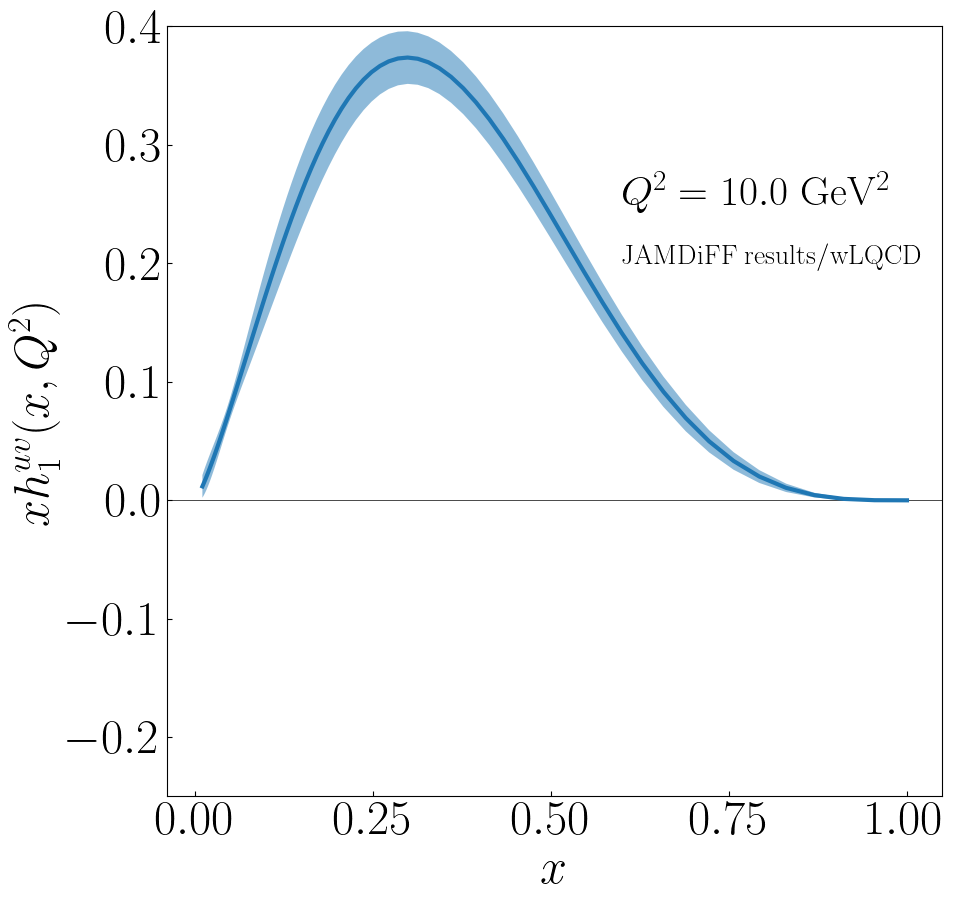

In [8]:
# Plot uv
fig = plt.figure(figsize=(10,10))
ax  = plt.axes()

flav = 'uv' # we plot transversity for this flavor

ax.set_ylim([-0.25,0.4])
ax.axhline(y=0,ls='-',lw=0.5,c='k')

# plot results
ax.plot(transversity['X'],transversity['XF'][flav]['mean'],lw=3) # Plot the mean value for transversity
ax.fill_between(transversity['X'],
                transversity['XF'][flav]['mean']-transversity['XF'][flav]['std'],
                transversity['XF'][flav]['mean']+transversity['XF'][flav]['std'],alpha=0.5) # Plot the uncertainty

# describe what we plot
ax.text(0.6,0.25,r'$Q^2=%.1f\; {\rm GeV^2}$'%Q2,size = 30)
ax.text(0.6,0.2,r'${\rm JAMDiFF\; %s}$'%wdir,size = 20)

# set labels
ax.tick_params(direction='in',labelsize=35)
ax.set_xlabel(r'$x$',size = 35)
ax.set_ylabel(r'$x h_{1}^{%s}(x,Q^2)$'%flav,size = 35)

plt.show()

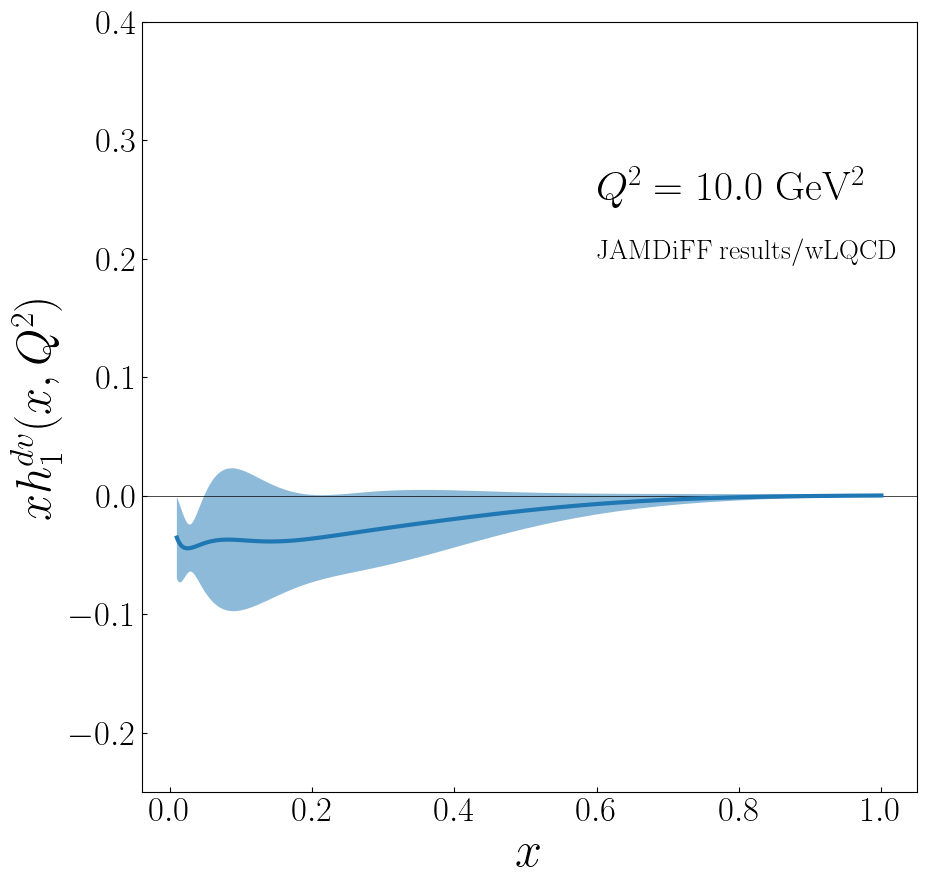

In [9]:
# Plot uv
fig = plt.figure(figsize=(10,10))
ax  = plt.axes()

flav = 'dv' # we plot transversity for this flavor

ax.set_ylim([-0.25,0.4])
ax.axhline(y=0,ls='-',lw=0.5,c='k')

# plot results
ax.plot(transversity['X'],transversity['XF'][flav]['mean'],lw=3) # Plot the mean value for transversity
ax.fill_between(transversity['X'],
                transversity['XF'][flav]['mean']-transversity['XF'][flav]['std'],
                transversity['XF'][flav]['mean']+transversity['XF'][flav]['std'],alpha=0.5) # Plot the uncertainty

# describe what we plot
ax.text(0.6,0.25,r'$Q^2=%.1f\; {\rm GeV^2}$'%Q2,size = 30)
ax.text(0.6,0.2,r'${\rm JAMDiFF\; %s}$'%wdir,size = 20)

# set labels
ax.tick_params(direction='in',labelsize=25)
ax.set_xlabel(r'$x$',size = 35)
ax.set_ylabel(r'$x h_{1}^{%s}(x,Q^2)$'%flav,size = 35)

plt.show()

# Generate diFFs (3 minutes)
Notice that it takes around 3 minutes to loop over all replicas

Produced dictionary will contain the following entries:
* ['Z'] - values of $z$
* ['M'] - values of $M$
* ['Q2'] - values of $Q^2$
* ['D'][flav] -$D_1(z,M_h)$ for all replicas
* flav is in ['u','d,'s','c','b','g']

In [10]:
from analysis.qpdlib import diff

In [11]:
Z=np.linspace(0.19,0.99,20)  # Choose the range of z to generate
M=np.linspace(0.28,2.05,50)  # Choose the range of M (GeV) to generate
Q2 = 10.                     # Choose the value of Q^2 (GeV^2)

In [13]:
#--from scipy stack
from scipy.integrate import quad, cumtrapz
from scipy.interpolate import griddata

#--from tools
from tools.tools     import load,save,checkdir,lprint
from tools.config    import conf,load_config

from qcdlib.aux import AUX

#--from fitlib
from fitlib.resman import RESMAN

#--from local
from analysis.corelib import core
from analysis.corelib import classifier

import warnings
warnings.filterwarnings("ignore")

def get_diFF(Z,M,Q2,wdir):
    """
    Generates diFFs
    Z: array with values of z
    M: array with values of M
    Q2: float with the values of Q^2
    wdir: str analysis to use, from ['results/noLQCD','results/wLQCD']

    Returns a dictionary with the following entries:
    * ['Z'] - values of $z$
    * ['M'] - values of $M$
    * ['Q2'] - values of $Q^2$
    * ['D'][flav]: where flav = str quark flavor from ['u','s,'c','b','g']
    """


    FLAV=[]
    FLAV.append('u')
    FLAV.append('s')
    FLAV.append('c')
    FLAV.append('b')
    FLAV.append('g')

    print('\ngenerating diff at Q2 = %s from %s'%(Q2,wdir))
    load_config('%s/input.py'%wdir)
    istep=core.get_istep()
    replicas=core.get_replicas(wdir)
    core.mod_conf(istep,replicas[0]) #--set conf as specified in istep

    if Q2==None: Q2 = conf['Q20']

    conf['SofferBound'] = False
    resman=RESMAN(nworkers=1,parallel=False,datasets=False,load_lhapdf=False)
    parman=resman.parman
    parman.order=replicas[0]['order'][istep]

    jar=load('%s/data/jar-%d.dat'%(wdir,istep))
    replicas=jar['replicas']

    diff=conf['diffpippim']
    #--setup kinematics
    NZ,NM = len(Z),len(M)
    shape = (NM,NZ)
    L = NM*NZ

    Zgrid, Mgrid = np.meshgrid(Z,M)
    Zgrid = Zgrid.flatten()
    Mgrid = Mgrid.flatten()

    D = {}

    cnt = 0
    for par in replicas:
        #core.mod_conf(istep,core.get_replicas(wdir)[cnt])
        lprint('%d/%d'%(cnt+1,len(replicas)))

        parman.set_new_params(par,initial=True)

        for flav in FLAV:
            if flav not in D: D[flav] = []
            func = diff.get_D(Zgrid,Mgrid,Q2*np.ones(L),flav,evolve=True)
            D[flav].append(func)

        cnt+=1

    return {'Zgrid':Zgrid,'Mgrid':Mgrid,'Q2':Q2,'D':D}

In [14]:
unpolarizedDiFFs = get_diFF(Z,M,Q2,wdir)


generating diff at Q2 = 10.0 from results/wLQCD
969/969

In [15]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm

In [16]:
def plot_diFF(data,Q2):

    mode = 1
    nrows,ncols=2,3
    N = nrows*ncols
    fig = py.figure(figsize=(ncols*6,nrows*5))
    ax11 = py.subplot(nrows,ncols,1)
    ax12 = py.subplot(nrows,ncols,2)
    ax13 = py.subplot(nrows,ncols,3)
    ax21 = py.subplot(nrows,ncols,4)
    ax22 = py.subplot(nrows,ncols,5)
    ax23 = py.subplot(nrows,ncols,6)

    hand = {}
    thy  = {}
    load_config('%s/input.py'%wdir)
    istep=core.get_istep()
    if Q2==None: Q2 = conf['Q20']

    conf['SofferBound'] = False
    RESMAN(datasets=False,load_lhapdf=False)
    diff = conf['diffpippim']

    M0 = diff.M0['u']

    replicas=core.get_replicas(wdir)

    Zfixed = [0.25,0.45,0.65]
    Mfixed = [0.40,1.00,1.60]

    N = 100
    Z = np.linspace(0.20,0.99,N)
    M = np.linspace(0.28,2.05,N)

    D     = data['D']
    Zgrid = data['Zgrid']
    Mgrid = data['Mgrid']

    for flav in D:
        diff = D[flav]
        if flav=='u': color = 'purple'
        if flav=='s': color = 'green'
        if flav=='c': color = 'orange'
        if flav=='b': color = 'pink'
        if flav=='g': color = 'blue'

        #if flav!='b': alpha = 0.0
        #else: alpha = 0.3

        #--plot with z fixed
        for i in range(len(Zfixed)):
            if i == 0: ax = ax11
            if i == 1: ax = ax12
            if i == 2: ax = ax13
            zfixed = Zfixed[i]*np.ones(N)

            #if mode==0:
            #    for j in range(len(D[flav])):
            #        result = griddata((Mgrid,Zgrid),D[flav][j],(M,zfixed),fill_value=0,method='cubic',rescale=True)
            #        hand[flav] ,= ax.plot(M,result,color=color,alpha=0.3,zorder=1)


            if mode==1:
                mean = np.mean(diff,axis=0)
                std  = np.std (diff,axis=0)
                mean = griddata((Mgrid,Zgrid),mean,(M,zfixed),fill_value=0,method='cubic',rescale=True)
                std  = griddata((Mgrid,Zgrid),std ,(M,zfixed),fill_value=0,method='cubic',rescale=True)
                hand[flav]  = ax.fill_between(M,(mean-std),(mean+std),color=color,alpha=0.8,zorder=1)

        #--plot with M fixed
        for i in range(len(Mfixed)):
            if i == 0: ax = ax21
            if i == 1: ax = ax22
            if i == 2: ax = ax23
            mfixed = Mfixed[i]*np.ones(N)

            #if mode==0:
            #    for j in range(len(D[flav])):
            #        result = griddata((Mgrid,Zgrid),D[flav][j],(mfixed,Z),fill_value=0,method='cubic',rescale=True)
            #        hand[flav] ,= ax.plot(Z,result,color=color,alpha=0.3,zorder=1)


            if mode==1:
                mean = np.mean(diff,axis=0)
                std  = np.std (diff,axis=0)
                mean = griddata((Mgrid,Zgrid),mean,(mfixed,Z),fill_value=0,method='cubic',rescale=True)
                std  = griddata((Mgrid,Zgrid),std ,(mfixed,Z),fill_value=0,method='cubic',rescale=True)

                hand[flav]  = ax.fill_between(Z,(mean-std),(mean+std),color=color,alpha=0.8,zorder=1)










    ##########################
    #--SET UP PLOT
    ##########################

    for ax in [ax11,ax12,ax13]:

          ax.tick_params(axis='both', which='major', top=True, right=True, direction='in',labelsize=30,length=8)
          ax.tick_params(axis='both', which='minor', top=True, right=True, direction='in',labelsize=30,length=4)

          minorLocator = MultipleLocator(0.1)
          ax.xaxis.set_minor_locator(minorLocator)
          minorLocator = MultipleLocator(1.0)
          #ax.yaxis.set_minor_locator(minorLocator)

          ax.set_xlabel(r'\boldmath$M_h~[{\rm GeV}]$',size=25)
          ax.axhline(0,0,1,color='black',alpha=1.0)


    ax11.set_xlim(0.28,1.3)
    ax11.set_xticks([0.4,0.6,0.8,1.0,1.2])

    ax12.set_xlim(0.28,2.0)
    ax12.set_xticks([0.4,0.8,1.2,1.6])

    ax13.set_xlim(0.28,2.0)
    ax13.set_xticks([0.4,0.8,1.2,1.6])

    ax21.set_xlim(0.2,1.0)
    ax21.set_xticks([0.4,0.6,0.8])

    ax22.set_xlim(0.2,1.0)
    ax22.set_xticks([0.4,0.6,0.8])

    ax23.set_xlim(0.4,1.0)
    ax23.set_xticks([0.6,0.8])


    for ax in [ax21,ax22,ax23]:

          ax.tick_params(axis='both', which='major', top=True, right=True, direction='in',labelsize=30,length=8)
          ax.tick_params(axis='both', which='minor', top=True, right=True, direction='in',labelsize=30,length=4)

          minorLocator = MultipleLocator(0.1)
          ax.xaxis.set_minor_locator(minorLocator)

          ax.set_xlabel(r'\boldmath$z$',size=25)
          ax.axhline(0,0,1,color='black',alpha=1.0)


    #--plot grid points
    for m in M0:
        for ax in [ax11,ax12,ax13]:
            ax.axvline(m,0,1,alpha=0.1,ls='--',color='black')

    ax11.set_ylabel(r'\boldmath$D_1^q(z,M_h) [{\rm GeV}^{-1}]$',size=25)
    ax21.set_ylabel(r'\boldmath$D_1^q(z,M_h) [{\rm GeV}^{-1}]$',size=25)

    #ax12.tick_params(labelleft=False)
    #ax13.tick_params(labelleft=False)
    #ax22.tick_params(labelleft=False)
    #ax23.tick_params(labelleft=False)

    ax11.set_ylim(-1.0,5.0)
    ax12.set_ylim(-1.0,3.1)
    ax13.set_ylim(-0.5,1.3)
    ax21.set_ylim(-1.0,5.0)
    ax22.set_ylim(-0.5,2.5)
    ax23.set_ylim(-0.5,0.3)

    #ax11.set_yticks([0,2,4,6,8,10])
    #ax12.set_yticks([0,2,4,6,8,10])
    #ax13.set_yticks([0,2,4,6,8,10])
    #ax21.set_yticks([0,2,4,6,8,10])
    #ax22.set_yticks([0,2,4,6,8,10])
    #ax23.set_yticks([0,2,4,6,8,10])

    minorLocator = MultipleLocator(0.25)
    ax11.yaxis.set_minor_locator(minorLocator)
    minorLocator = MultipleLocator(0.25)
    ax12.yaxis.set_minor_locator(minorLocator)
    minorLocator = MultipleLocator(0.25)
    ax13.yaxis.set_minor_locator(minorLocator)
    minorLocator = MultipleLocator(0.25)
    ax21.yaxis.set_minor_locator(minorLocator)
    minorLocator = MultipleLocator(0.25)
    ax22.yaxis.set_minor_locator(minorLocator)
    minorLocator = MultipleLocator(0.10)
    ax23.yaxis.set_minor_locator(minorLocator)




    ax22.text(0.35,0.75,r'\boldmath$Q^2=%s~{\rm GeV}^2$'%Q2, transform=ax22.transAxes,size=20)

    ax11.text(0.40,0.85,r'$z=0.25$', transform=ax11.transAxes,size=20)
    ax12.text(0.40,0.85,r'$z=0.45$', transform=ax12.transAxes,size=20)
    ax13.text(0.40,0.85,r'$z=0.65$', transform=ax13.transAxes,size=20)

    ax21.text(0.35,0.85,r'$M_h=0.4~{\rm GeV}$', transform=ax21.transAxes,size=20)
    ax22.text(0.35,0.85,r'$M_h=1.0 ~{\rm GeV}$', transform=ax22.transAxes,size=20)
    ax23.text(0.35,0.85,r'$M_h=1.6 ~{\rm GeV}$', transform=ax23.transAxes,size=20)

    #ax13.text(0.68,0.75,r'\boldmath$5 \times D_1^q$', transform=ax13.transAxes,size=30)
    #ax23.text(0.68,0.75,r'\boldmath$5 \times D_1^q$', transform=ax23.transAxes,size=30)

    handles = []
    handles.append(hand['u'])
    handles.append(hand['s'])
    handles.append(hand['c'])

    labels = []
    labels.append(r'\boldmath$u$')
    labels.append(r'\boldmath$s$')
    labels.append(r'\boldmath$c$')

    ax11.legend(handles,labels,loc='upper right',fontsize=30,frameon=0,handletextpad=0.3,handlelength=0.9,ncol=1,columnspacing=1.0)

    handles = []
    handles.append(hand['b'])
    handles.append(hand['g'])

    labels = []
    labels.append(r'\boldmath$b$')
    labels.append(r'\boldmath$g$')

    ax12.legend(handles,labels,loc='upper right',fontsize=30,frameon=0,handletextpad=0.3,handlelength=0.9,ncol=1,columnspacing=1.0)


    py.tight_layout()
    py.subplots_adjust(hspace=0.3,wspace=0.2)






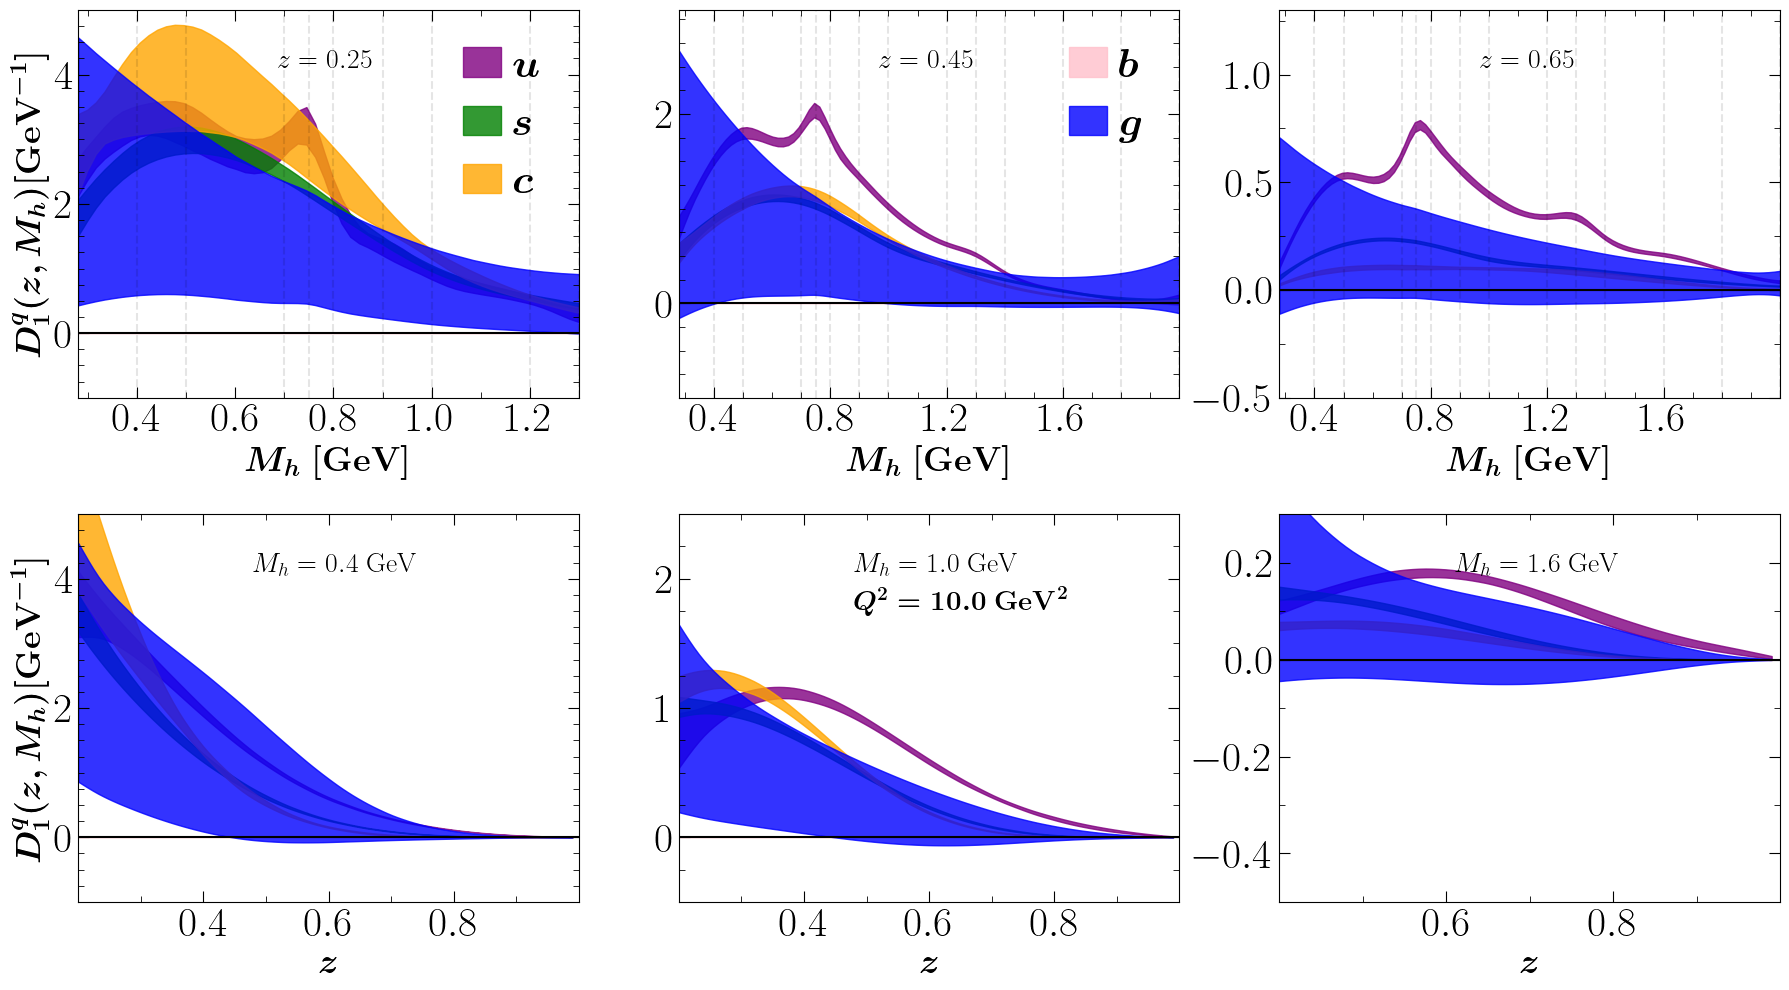

In [17]:
plot_diFF(unpolarizedDiFFs,Q2)